In [1]:
import csv
import imp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from statsmodels import regression

In [7]:
with open('salaries_cyber.csv', 'r') as outfile:
    reader = csv.DictReader(outfile)
    
    line_count = 0
    for row in reader:
        if line_count == 0:
            print(f"columns are {','.join(row)}")
            line_count += 1

columns are work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [8]:
pd.set_option('display.max_columns', None)
# read data
df = pd.read_csv('salaries_cyber.csv')
# read top 5 data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [30]:
max_salary = df['salary_in_usd'].max()
df.loc[df['salary_in_usd'] == max_salary, ['job_title', 'employment_type','employee_residence', 'company_location']]

,job_title,employment_type,employee_residence,company_location
512,Detection Engineer,FT,GB,GB


In [109]:
new_df = df.loc[df['job_title'] == 'Cyber Security Analyst', ['salary','employee_residence', 'employment_type', 'experience_level']]

fig = px.bar(new_df, 'employee_residence', 'salary', color='employee_residence', height=500)
fig.show()

In [92]:
df.assign(temp_df = lambda x: x['job_title'].str.contains('Cyber|Security'))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,temp_df
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S,True
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M,True
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M,True
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L,True
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,True
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,True
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,False
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,True


In [82]:
df.groupby(['job_title', 'salary']).agg(['mean','min', 'max'])
df.groupby('job_title').groups.keys()

new = [] 
check_job_title = 'Data Security Analyst'
for job in df['job_title'].unique():
    if job.startswith('D') or job.startswith('A'):
        new.append(job)
        
new_mask = df['job_title'].str.contains('|'.join(new))
df[new_mask]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L
11,2022,SE,FT,Application Security Specialist,85000,USD,85000,US,100,US,L
23,2022,MI,FT,DevSecOps Engineer,152000,USD,152000,US,0,US,M
24,2022,MI,FT,DevSecOps Engineer,91000,USD,91000,US,0,US,M
26,2022,MI,FT,Application Security Engineer,207000,USD,207000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
1232,2020,MI,FT,DevOps Security Engineer,144000,USD,144000,US,0,US,M
1234,2020,EN,FT,Application Security Engineer,100000,USD,100000,AF,0,AF,S
1235,2020,MI,FT,Application Security Engineer,110000,USD,110000,US,50,US,L
1237,2021,EN,FT,Application Security Engineer,65000,USD,65000,US,100,US,L


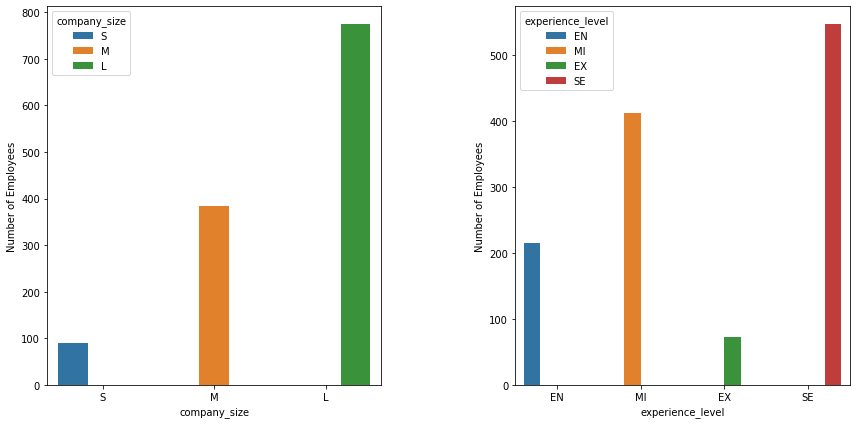

In [81]:
company_size = df['company_size']
# company_size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
font = {
    'family':'serif',
    'weight': 'normal',
    'size': 14
}
axes[0] = sns.countplot('company_size', hue='company_size', ax=axes[0], data=df)
axes[0].set_ylabel('Number of Employees')
axes[1] = sns.countplot('experience_level', hue='experience_level', ax=axes[1], data=df)
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

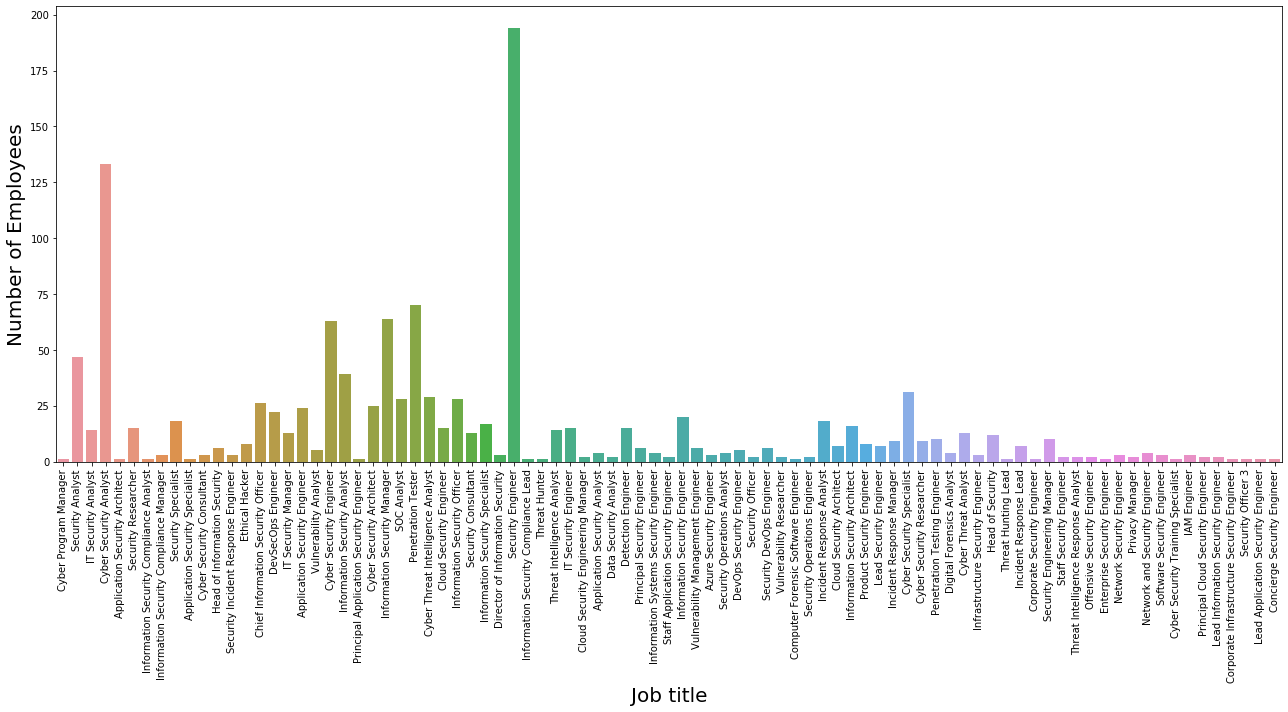

In [42]:
salary_data = df['job_title'].value_counts()
# plot the data 
fig = plt.figure(figsize=(18,10))
sns.countplot(df['job_title'])
plt.xlabel('Job title', fontdict={'fontsize':20})
plt.ylabel('Number of Employees', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

In [52]:
df_ = sm.datasets.get_rdataset('Guerry', 'HistData').data
df_.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,73,58,11,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,22,10,82,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,61,66,68,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,76,49,5,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,83,65,10,22,23,64,79,35,7,1,320.280,5549,129.10


In [55]:
cols = df_[['Department', 'Region', 'Literacy', 'Lottery']]
cols

,Department,Region,Literacy,Lottery
0,Ain,E,37,41
1,Aisne,N,51,38
2,Allier,C,13,66
3,Basses-Alpes,E,46,80
4,Hautes-Alpes,E,69,79
...,...,...,...,...
81,Vienne,W,25,40
82,Haute-Vienne,C,13,55
83,Vosges,E,62,14
84,Yonne,C,47,51


In [65]:
y, X = dmatrices('Lottery ~ WealthLiteracy', data=df_, return_type='dataframe')

model = sm.OLS(y, X)

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     11.13
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.33e-06
Time:                        14:19:04   Log-Likelihood:                -383.56
No. Observations:                  86   AIC:                             775.1
Df Residuals:                      82   BIC:                             784.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.8437     16.190     

In [78]:
def nplog(x):
    return np.log(x) + 1

res1 = smf.ols(formula='Lottery ~ nplog(Literacy)', data=df_).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.26
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           0.000296
Time:                        14:28:11   Log-Likelihood:                -391.50
No. Observations:                  86   AIC:                             787.0
Df Residuals:                      84   BIC:                             791.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         133.0289     23.841     

In [83]:
print("Parameter: ", res.params)
print("Std Errors: ", res.bse)
print('Prediction: ', res.predict())
print('R2Squared: ', res.rsquared)

Parameter:  Intercept          38.843678
Wealth              0.429771
Literacy           -0.340264
Wealth:Literacy    -0.000429
dtype: float64
Std Errors:  Intercept          16.190250
Wealth              0.289170
Literacy            0.341252
Wealth:Literacy     0.006333
dtype: float64
Prediction:  [56.46929642 30.4641824  60.29632597 54.35542271 48.58133424 64.78504206
 29.28059325 63.10685496 24.43079486 34.33302438 49.11957173 26.7406063
 25.22473879 52.86790589 62.22725045 33.00831742 61.14472206 66.18288779
 24.89262811 63.00329082 63.77067219 58.04220003 26.357175   51.72914181
 29.64836696 24.94225853 48.97998103 35.96132365 37.87456922 42.45287388
 28.53410352 28.4575552  53.38503231 55.87328598 40.94785042 56.10305343
 38.70994602 63.1554649  37.60227966 38.99215609 63.25577079 64.23593499
 28.25848234 48.29560293 31.21086404 61.85766765 45.29458313 37.37511713
 22.64296856 24.31729743 48.40044496 38.54106111 34.36262513 54.42091017
 40.93141339 50.57107378 35.02523324 26.5687

In [97]:
preds = res.predict()
cols['prediction'] = preds
cols.dropna()

,Department,Region,Literacy,Lottery,prediction
0,Ain,E,37,41,56.469296
1,Aisne,N,51,38,30.464182
2,Allier,C,13,66,60.296326
3,Basses-Alpes,E,46,80,54.355423
4,Hautes-Alpes,E,69,79,48.581334
...,...,...,...,...,...
80,Vendee,W,28,68,52.711274
81,Vienne,W,25,40,58.832731
82,Haute-Vienne,C,13,55,62.841514
83,Vosges,E,62,14,50.809061


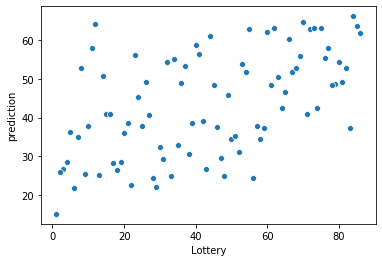

In [103]:
sns.scatterplot('Lottery', 'prediction', data=cols)

In [118]:
def plot_compare():
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    # ax.plot( 'o', label=df)
    ax.plot('Lottery', 'b--',  label='True')
    ax.plot(res.fittedvalues, 'r--', label='OLS')
    ax.legend(loc='best')
    

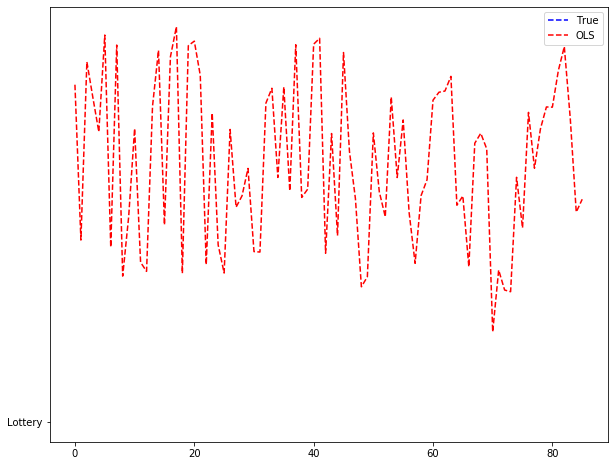

In [119]:
plot_compare(cols)